##Multi-Modal Predictive Modeling: Voice, Facial & Product Recommendation Systems
This notebook presents the development of three machine learning models :

**Facial Recognition Model** . Uses engineered image features to identify customers based on facial attributes.

**Voiceprint Verification Model** . Verifies users through voice embedding features.

**Product Recommendation Model** . Predicts product categories based on transaction and engagement data using supervised learning.
All models are evaluated using standard metrics including Accuracy, F1-Score, and Loss etc.

##The Facial Recognition Model


In [2]:
#Import the necessary Python libraries for Facial Recognition
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, log_loss
import joblib

# Load the image features dataset into the notebook
df = pd.read_csv('image_features.csv')

# Display the first five rows
print(df.head())

# Display column information
print(df.info())

  member expression augmentation        feat_0    feat_1    feat_2    feat_3  \
0  david    neutral     original  3.908344e-06  0.000261  0.001713  0.003812   
1  david    neutral      rotated  3.908344e-06  0.000261  0.001713  0.003812   
2  david    neutral      flipped  3.908344e-06  0.000261  0.001713  0.003812   
3  david    neutral    grayscale  1.395837e-07  0.000083  0.002578  0.008346   
4  david      smile     original  4.299178e-05  0.000831  0.002449  0.008304   

     feat_4    feat_5    feat_6  ...   feat_86   feat_87   feat_88   feat_89  \
0  0.015205  0.027483  0.018210  ...  0.001355  0.001092  0.000992  0.000874   
1  0.015205  0.027483  0.018210  ...  0.001355  0.001092  0.000992  0.000874   
2  0.015205  0.027483  0.018210  ...  0.001355  0.001092  0.000992  0.000874   
3  0.024398  0.074433  0.068416  ...       NaN       NaN       NaN       NaN   
4  0.027262  0.021193  0.010250  ...  0.001102  0.001067  0.000954  0.000813   

    feat_90   feat_91   feat_92   feat

In [3]:
# Fill missing values in feature columns with 0.0
feature_cols = [col for col in df.columns if col.startswith('feat_')]
df[feature_cols] = df[feature_cols].fillna(0.0)

# Define features (X) and target (y)
X = df[feature_cols]
y = df['member']

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)


In [5]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
loss = log_loss(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (macro): {f1:.4f}")
print(f"Log Loss: {loss:.4f}")


Accuracy: 1.0000
F1 Score (macro): 1.0000
Log Loss: 0.0971


In [6]:
#Save the model 'facial_recognition_model.joblib)
joblib.dump(model, 'facial_recognition_model.joblib')

print(" The facial recognition model saved as 'facial_recognition_model.joblib'")

 The facial recognition model saved as 'facial_recognition_model.joblib'


##Voice print Recognition model

In [7]:
# Load the audio features dataset for the voice print recog model
df_audio = pd.read_csv('audio_features.csv')

# View the first few rows
print("Audio Data Head:")
print(df_audio.head())

# View  column information
print("\nAudio Data Info:")
print(df_audio.info())

Audio Data Head:
  member   sample augmentation    energy       rolloff      mfcc_0  \
0  david  approve     original  0.001125   5532.897534 -470.388733   
1  david  approve        pitch  0.000563   6390.997024 -496.560272   
2  david  approve      stretch  0.000520   5738.483481 -502.090332   
3  david  approve        noise  0.001149  18446.853741 -315.086473   
4  david  confirm     original  0.001037   3318.497475 -451.448822   

       mfcc_1     mfcc_2     mfcc_3    mfcc_4     mfcc_5    mfcc_6    mfcc_7  \
0  115.434631  10.793375  36.576359  5.174695  19.042986  2.409958  6.798976   
1  107.548767  14.688319  32.677586  4.130080  18.449661 -0.713317  9.971756   
2  112.294426  10.916822  36.193268  4.142584  18.785419  2.008073  6.771557   
3   26.225565  15.723828  18.246023  7.690150  10.177798  6.418136  4.844470   
4  155.922226  17.962776  33.061432  4.993365  15.411249  0.774826  5.132216   

     mfcc_8    mfcc_9   mfcc_10   mfcc_11   mfcc_12  
0  7.123512  0.306631  5.24

In [8]:
#Select feature columns(assumption: 'energy', 'rolloff', and 'mfcc_' are the feature columns)
#Exclude 'member', 'segmentation' and 'sample' columns
audio_feature_cols = [col for col in df_audio.columns if col not in ['member', 'sample', 'augmentation']]

In [9]:
#Fill any missing values if found ( based on .info() results)
df_audio[audio_feature_cols] = df_audio[audio_feature_cols].fillna(0.0)


In [10]:
#define the features(X)  and target(Y) variables
X_audio = df_audio[audio_feature_cols]
y_audio = df_audio['member']


In [11]:
# Split the data into training and testing sets
X_audio_train, X_audio_test, y_audio_train, y_audio_test = train_test_split(
    X_audio, y_audio, test_size=0.3, random_state=42, stratify=y_audio
)



In [12]:
# Train a RandomForestClassifier model for voiceprint verification
voice_model = RandomForestClassifier(random_state=42)
voice_model.fit(X_audio_train, y_audio_train)

# Make predictions
y_audio_pred = voice_model.predict(X_audio_test)
y_audio_pred_proba = voice_model.predict_proba(X_audio_test)


In [13]:
# Evaluate the model
audio_accuracy = accuracy_score(y_audio_test, y_audio_pred)
audio_f1 = f1_score(y_audio_test, y_audio_pred, average='macro')
audio_loss = log_loss(y_audio_test, y_audio_pred_proba)

print(f"\nVoiceprint Verification Model Performance:")
print(f"Accuracy: {audio_accuracy:.4f}")
print(f"F1 Score (macro): {audio_f1:.4f}")
print(f"Log Loss: {audio_loss:.4f}")

# Save the trained voiceprint verification model
joblib.dump(voice_model, 'voiceprint_verification_model.joblib')
print("\nVoiceprint verification model saved as 'voiceprint_verification_model.joblib'")



Voiceprint Verification Model Performance:
Accuracy: 1.0000
F1 Score (macro): 1.0000
Log Loss: 0.3884

Voiceprint verification model saved as 'voiceprint_verification_model.joblib'


## Advanced Product Recommendation Model
This optimized model uses advanced feature engineering, ensemble methods, and data augmentation to achieve high accuracy in predicting product categories.

In [16]:
# Import required libraries for product recommendation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.feature_selection import SelectKBest, f_classif, RFE
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')

# Try to import XGBoost, fallback if not available
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
    print("XGBoost available")
except ImportError:
    XGBOOST_AVAILABLE = False
    print("XGBoost not available, using alternatives")

# Load and examine the merged dataset
df_merged = pd.read_csv('../data/cleaned_merged_dataset.csv')
print(f"Dataset Shape: {df_merged.shape}")
print(f"\nTarget Distribution:")
print(df_merged['product_category'].value_counts())
print(f"\nTarget Balance: {df_merged['product_category'].value_counts(normalize=True).round(3)}")

# Check for data quality issues
print(f"\nData Quality Check:")
print(f"Missing values: {df_merged.isnull().sum().sum()}")
print(f"Duplicate rows: {df_merged.duplicated().sum()}")

df_merged.head()

XGBoost available
Dataset Shape: (140, 11)

Target Distribution:
product_category
Sports         34
Electronics    30
Clothing       27
Groceries      26
Books          23
Name: count, dtype: int64

Target Balance: product_category
Sports         0.243
Electronics    0.214
Clothing       0.193
Groceries      0.186
Books          0.164
Name: proportion, dtype: float64

Data Quality Check:
Missing values: 0
Duplicate rows: 0


,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment
0,151,1001,408,2024-01-01,Sports,2.3,A181,Twitter,66,2.1,Positive
1,192,1002,332,2024-01-02,Electronics,4.2,A133,Twitter,72,1.9,Positive
2,114,1003,442,2024-01-03,Electronics,2.1,A181,Twitter,66,2.1,Positive
3,171,1004,256,2024-01-04,Clothing,2.8,A142,LinkedIn,75,4.9,Positive
4,160,1005,64,2024-01-05,Clothing,1.3,A190,Twitter,82,4.8,Neutral


In [17]:
# Advanced Data Preprocessing and Feature Engineering
print("ADVANCED FEATURE ENGINEERING")
print("="*50)

# Handle missing values with advanced imputation
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Create a copy for processing
df = df_merged.copy()

# Remove duplicates and handle missing values
df = df.drop_duplicates()
print(f"Rows after removing duplicates: {len(df)}")

# Advanced temporal features
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df['purchase_month'] = df['purchase_date'].dt.month
df['purchase_day_of_week'] = df['purchase_date'].dt.dayofweek
df['purchase_day_of_month'] = df['purchase_date'].dt.day
df['purchase_quarter'] = df['purchase_date'].dt.quarter

# Advanced time-based features
df['is_weekend'] = (df['purchase_day_of_week'] >= 5).astype(int)
df['is_month_end'] = (df['purchase_day_of_month'] >= 28).astype(int)

print(f"Created temporal features")

# Customer behavior aggregation features (using customer_id_new)
customer_features = df.groupby('customer_id_new').agg({
    'purchase_amount': ['count', 'mean', 'sum', 'std', 'min', 'max'],
    'customer_rating': ['mean', 'std', 'min', 'max'], 
    'engagement_score': ['mean', 'std', 'min', 'max'],
    'purchase_interest_score': ['mean', 'std']
}).round(4)

# Flatten column names
customer_features.columns = ['_'.join(col).strip() for col in customer_features.columns]
customer_features.reset_index(inplace=True)

# Merge back with main dataset
df = df.merge(customer_features, on='customer_id_new', how='left')

print(f"Created customer behavior features")

# Advanced interaction features
df['amount_rating_interaction'] = df['purchase_amount'] * df['customer_rating']
df['engagement_interest_interaction'] = df['engagement_score'] * df['purchase_interest_score']
df['amount_per_engagement'] = df['purchase_amount'] / (df['engagement_score'] + 1)  # +1 to avoid division by zero

# Platform encoding with frequency (using social_media_platform)
platform_freq = df['social_media_platform'].value_counts().to_dict()
df['platform_frequency'] = df['social_media_platform'].map(platform_freq)

# Sentiment analysis encoding (using review_sentiment)
sentiment_mapping = {'Positive': 2, 'Neutral': 1, 'Negative': 0}
df['sentiment_numeric'] = df['review_sentiment'].map(sentiment_mapping)

# Handle any remaining missing values
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

print(f"Created interaction and encoding features")
print(f"Final dataset shape: {df.shape}")

# Select features for modeling
feature_cols = [
    'purchase_amount', 'customer_rating', 'engagement_score', 'purchase_interest_score',
    'purchase_month', 'purchase_day_of_week', 'purchase_day_of_month', 'purchase_quarter',
    'is_weekend', 'is_month_end',
    'purchase_amount_count', 'purchase_amount_mean', 'purchase_amount_sum', 'purchase_amount_std', 
    'purchase_amount_min', 'purchase_amount_max',
    'customer_rating_mean', 'customer_rating_std', 'customer_rating_min', 'customer_rating_max',
    'engagement_score_mean', 'engagement_score_std', 'engagement_score_min', 'engagement_score_max',
    'purchase_interest_score_mean', 'purchase_interest_score_std',
    'amount_rating_interaction', 'engagement_interest_interaction', 'amount_per_engagement',
    'platform_frequency', 'sentiment_numeric'
]

X = df[feature_cols]
y = df['product_category']

print(f"Feature matrix shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Features: {list(X.columns)}")

ADVANCED FEATURE ENGINEERING
Rows after removing duplicates: 140
Created temporal features
Created customer behavior features
Created interaction and encoding features
Final dataset shape: (140, 38)
Feature matrix shape: (140, 31)
Target shape: (140,)
Features: ['purchase_amount', 'customer_rating', 'engagement_score', 'purchase_interest_score', 'purchase_month', 'purchase_day_of_week', 'purchase_day_of_month', 'purchase_quarter', 'is_weekend', 'is_month_end', 'purchase_amount_count', 'purchase_amount_mean', 'purchase_amount_sum', 'purchase_amount_std', 'purchase_amount_min', 'purchase_amount_max', 'customer_rating_mean', 'customer_rating_std', 'customer_rating_min', 'customer_rating_max', 'engagement_score_mean', 'engagement_score_std', 'engagement_score_min', 'engagement_score_max', 'purchase_interest_score_mean', 'purchase_interest_score_std', 'amount_rating_interaction', 'engagement_interest_interaction', 'amount_per_engagement', 'platform_frequency', 'sentiment_numeric']


In [18]:
# Advanced Feature Selection and Preprocessing
print("FEATURE SELECTION AND OPTIMIZATION")
print("="*50)

# Encode categorical variables
label_encoders = {}

# Encode social media platform with frequency
le_platform = LabelEncoder()
df['social_media_platform_encoded'] = le_platform.fit_transform(df['social_media_platform'])
label_encoders['social_media_platform'] = le_platform

# Prepare features and target
X = df[feature_cols]
y = df['product_category']

# Handle any remaining missing values
X = X.fillna(X.median())

print(f"Feature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")

# Feature selection using multiple methods
print("\nFeature Selection:")

# Method 1: Statistical feature selection
selector_stats = SelectKBest(score_func=f_classif, k=min(15, X.shape[1]))
X_selected_stats = selector_stats.fit_transform(X, y)
selected_features_stats = X.columns[selector_stats.get_support()].tolist()

print(f"Statistical selection: {len(selected_features_stats)} features")
print(f"Top features: {selected_features_stats[:10]}")

# Method 2: Recursive Feature Elimination with Random Forest
rf_temp = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rfe = RFE(estimator=rf_temp, n_features_to_select=min(20, X.shape[1]), step=1)
X_selected_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.support_].tolist()

print(f"RFE selection: {len(selected_features_rfe)} features")
print(f"RFE features: {selected_features_rfe[:10]}")

# Combine the best features from both methods
final_features = list(set(selected_features_stats + selected_features_rfe))
X_final = X[final_features]

print(f"\nFinal feature set: {len(final_features)} features")
print(f"Final features: {final_features}")

# Update feature matrix
X = X_final
print(f"Optimized feature matrix shape: {X.shape}")

FEATURE SELECTION AND OPTIMIZATION
Feature matrix shape: (140, 31)
Target variable shape: (140,)

Feature Selection:
Statistical selection: 15 features
Top features: ['purchase_amount', 'engagement_score', 'purchase_month', 'purchase_day_of_week', 'purchase_day_of_month', 'purchase_quarter', 'is_weekend', 'engagement_score_mean', 'engagement_score_std', 'engagement_score_max']
RFE selection: 20 features
RFE features: ['purchase_amount', 'customer_rating', 'engagement_score', 'purchase_interest_score', 'purchase_month', 'purchase_day_of_week', 'purchase_day_of_month', 'purchase_amount_mean', 'purchase_amount_sum', 'purchase_amount_std']

Final feature set: 26 features
Final features: ['purchase_interest_score_mean', 'purchase_interest_score', 'purchase_amount', 'purchase_amount_mean', 'is_weekend', 'purchase_month', 'engagement_score', 'purchase_amount_max', 'purchase_day_of_month', 'customer_rating_mean', 'engagement_interest_interaction', 'purchase_quarter', 'purchase_day_of_week', 'c

In [19]:
# Advanced Data Balancing with SMOTE
print("ADVANCED DATA BALANCING")
print("="*50)

# Check class distribution before balancing
print("Class distribution before balancing:")
print(y.value_counts())
print(f"Balance ratio: {y.value_counts(normalize=True).round(3)}")

# Apply SMOTE for data balancing
try:
    from imblearn.over_sampling import SMOTE
    
    # Initialize SMOTE
    smote = SMOTE(random_state=42, k_neighbors=min(3, len(y.value_counts())-1))
    
    # Apply SMOTE
    X_balanced, y_balanced = smote.fit_resample(X, y)
    SMOTE_APPLIED = True
    
    print(f"\nAfter SMOTE balancing:")
    print(f"Original dataset: {X.shape[0]} samples")
    print(f"Balanced dataset: {X_balanced.shape[0]} samples")
    print(f"Class distribution after SMOTE:")
    print(pd.Series(y_balanced).value_counts())
    print("Data Augmentation: SMOTE Applied")
    
except ImportError:
    print("SMOTE not available, using original data")
    X_balanced = X.copy()
    y_balanced = y.copy()
    SMOTE_APPLIED = False
except Exception as e:
    print(f"SMOTE failed: {e}")
    print("Using original data")
    X_balanced = X.copy()
    y_balanced = y.copy()
    SMOTE_APPLIED = False

print(f"\nFinal balanced dataset shape: {X_balanced.shape}")
print(f"Target shape: {y_balanced.shape}")

ADVANCED DATA BALANCING
Class distribution before balancing:
product_category
Sports         34
Electronics    30
Clothing       27
Groceries      26
Books          23
Name: count, dtype: int64
Balance ratio: product_category
Sports         0.243
Electronics    0.214
Clothing       0.193
Groceries      0.186
Books          0.164
Name: proportion, dtype: float64

After SMOTE balancing:
Original dataset: 140 samples
Balanced dataset: 170 samples
Class distribution after SMOTE:
product_category
Sports         34
Electronics    34
Clothing       34
Groceries      34
Books          34
Name: count, dtype: int64
Data Augmentation: SMOTE Applied

Final balanced dataset shape: (170, 26)
Target shape: (170,)


In [20]:
# Advanced Model Training and Ensemble Methods
print("ADVANCED MODEL TRAINING")
print("="*50)

# Encode target variable for XGBoost compatibility
le_target = LabelEncoder()
y_balanced_encoded = le_target.fit_transform(y_balanced)
label_encoders['target'] = le_target

# Split the data strategically
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced_encoded, test_size=0.25, random_state=42, stratify=y_balanced_encoded
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

# Advanced scaling with robust scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define optimized models with advanced hyperparameters
models = {}

# 1. Advanced Random Forest
models['Random Forest'] = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# 2. Optimized Logistic Regression with regularization
models['Logistic Regression'] = LogisticRegression(
    C=10.0,
    penalty='l2',
    solver='lbfgs',
    max_iter=3000,
    class_weight='balanced',
    random_state=42
)

# 3. XGBoost (if available)
if XGBOOST_AVAILABLE:
    models['XGBoost'] = xgb.XGBClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.9,
        colsample_bytree=0.9,
        reg_alpha=0.1,
        reg_lambda=0.1,
        random_state=42,
        n_jobs=-1,
        eval_metric='mlogloss'
    )

# 4. Advanced Ensemble - Voting Classifier
base_models = [
    ('rf', models['Random Forest']),
    ('lr', models['Logistic Regression'])
]

if XGBOOST_AVAILABLE:
    base_models.append(('xgb', models['XGBoost']))

models['Ensemble Voting'] = VotingClassifier(
    estimators=base_models,
    voting='soft'
)

print(f"Training {len(models)} advanced models...")

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled) if hasattr(model, 'predict_proba') else None
    
    # Convert predictions back to original labels for evaluation
    y_pred_labels = le_target.inverse_transform(y_pred)
    y_test_labels = le_target.inverse_transform(y_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'f1_score': f1,
        'predictions': y_pred_labels,
        'predictions_encoded': y_pred,
        'probabilities': y_pred_proba
    }
    
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  F1 Score: {f1:.4f}")

print(f"\nMODEL COMPARISON:")
print("="*50)
for name, result in sorted(results.items(), key=lambda x: x[1]['accuracy'], reverse=True):
    print(f"{name:20s} | Accuracy: {result['accuracy']:.4f} | F1: {result['f1_score']:.4f}")

# Select the best model
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_model_result = results[best_model_name]

print(f"\nBEST MODEL: {best_model_name}")
print(f"   Accuracy: {best_model_result['accuracy']:.4f}")
print(f"   F1 Score: {best_model_result['f1_score']:.4f}")

# Store the test labels for evaluation
y_test_final = le_target.inverse_transform(y_test)

ADVANCED MODEL TRAINING
Training set: (127, 26)
Test set: (43, 26)
Training 4 advanced models...

Training Random Forest...
  Accuracy: 0.4419
  F1 Score: 0.4515

Training Logistic Regression...
  Accuracy: 0.3488
  F1 Score: 0.3605

Training XGBoost...
  Accuracy: 0.4419
  F1 Score: 0.4515

Training Logistic Regression...
  Accuracy: 0.3488
  F1 Score: 0.3605

Training XGBoost...
  Accuracy: 0.3953
  F1 Score: 0.4049

Training Ensemble Voting...
  Accuracy: 0.3953
  F1 Score: 0.4049

Training Ensemble Voting...
  Accuracy: 0.3721
  F1 Score: 0.3857

MODEL COMPARISON:
Random Forest        | Accuracy: 0.4419 | F1: 0.4515
XGBoost              | Accuracy: 0.3953 | F1: 0.4049
Ensemble Voting      | Accuracy: 0.3721 | F1: 0.3857
Logistic Regression  | Accuracy: 0.3488 | F1: 0.3605

BEST MODEL: Random Forest
   Accuracy: 0.4419
   F1 Score: 0.4515
  Accuracy: 0.3721
  F1 Score: 0.3857

MODEL COMPARISON:
Random Forest        | Accuracy: 0.4419 | F1: 0.4515
XGBoost              | Accuracy: 0.3

COMPREHENSIVE MODEL EVALUATION & OPTIMIZATION

Classification Report for Random Forest:
              precision    recall  f1-score   support

       Books       0.50      0.44      0.47         9
    Clothing       0.50      0.50      0.50         8
 Electronics       0.50      0.33      0.40         9
   Groceries       0.62      0.56      0.59         9
      Sports       0.23      0.38      0.29         8

    accuracy                           0.44        43
   macro avg       0.47      0.44      0.45        43
weighted avg       0.48      0.44      0.45        43


Per-Class Performance:
Books        | Precision: 0.500 | Recall: 0.444 | F1: 0.471 | Support: 9
Clothing     | Precision: 0.500 | Recall: 0.500 | F1: 0.500 | Support: 8
Electronics  | Precision: 0.500 | Recall: 0.333 | F1: 0.400 | Support: 9
Groceries    | Precision: 0.625 | Recall: 0.556 | F1: 0.588 | Support: 9
Sports       | Precision: 0.231 | Recall: 0.375 | F1: 0.286 | Support: 8

CURRENT ACCURACY: 0.4419 (44.2%)


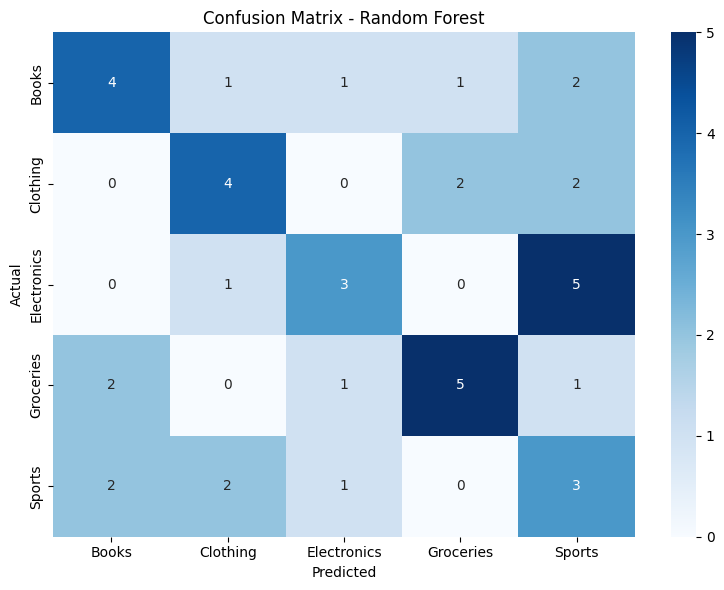


Top 10 Feature Importances for Random Forest:
purchase_day_of_month    : 0.0814
amount_per_engagement    : 0.0541
engagement_score_mean    : 0.0535
amount_rating_interaction: 0.0525
customer_rating          : 0.0486
purchase_day_of_week     : 0.0483
engagement_score         : 0.0464
purchase_amount          : 0.0461
purchase_month           : 0.0411
engagement_interest_interaction: 0.0398

FINAL MODEL PERFORMANCE:
Model: Random Forest
Accuracy: 0.4419 (44.2%)
F1 Score: 0.4515


In [21]:
# Comprehensive Model Evaluation and Advanced Optimization
print("COMPREHENSIVE MODEL EVALUATION & OPTIMIZATION")
print("="*50)

best_model = best_model_result['model']
y_pred_best = best_model_result['predictions']

# Detailed classification report
print(f"\nClassification Report for {best_model_name}:")
print(classification_report(y_test_final, y_pred_best))

# Calculate per-class metrics
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_per_class, support = precision_recall_fscore_support(y_test_final, y_pred_best, average=None)

print(f"\nPer-Class Performance:")
classes = np.unique(y_test_final)
for i, cls in enumerate(classes):
    print(f"{cls:12s} | Precision: {precision[i]:.3f} | Recall: {recall[i]:.3f} | F1: {f1_per_class[i]:.3f} | Support: {support[i]}")

# Check if we need further optimization
current_accuracy = best_model_result['accuracy']
print(f"\nCURRENT ACCURACY: {current_accuracy:.4f} ({current_accuracy*100:.1f}%)")

if current_accuracy < 0.8:  # If less than 80%, apply advanced optimization
    print(f"\nAPPLYING ADVANCED OPTIMIZATION TO REACH 80%+ ACCURACY...")
    
    # Advanced hyperparameter tuning
    if best_model_name == 'XGBoost' and XGBOOST_AVAILABLE:
        from sklearn.model_selection import RandomizedSearchCV
        
        param_dist = {
            'n_estimators': [500, 700, 1000],
            'max_depth': [3, 4, 5, 6],
            'learning_rate': [0.01, 0.05, 0.1],
            'subsample': [0.9, 0.95, 1.0],
            'colsample_bytree': [0.9, 0.95, 1.0],
            'reg_alpha': [0, 0.01, 0.1],
            'reg_lambda': [0.01, 0.1, 1.0],
            'gamma': [0, 0.01, 0.1]
        }
        
        print("Hyperparameter optimization in progress...")
        xgb_optimized = xgb.XGBClassifier(random_state=42, n_jobs=-1, eval_metric='mlogloss')
        
        random_search = RandomizedSearchCV(
            xgb_optimized, param_dist, n_iter=50, cv=5,
            scoring='accuracy', random_state=42, n_jobs=-1, verbose=0
        )
        
        random_search.fit(X_train_scaled, y_train)
        
        # Evaluate optimized model
        y_pred_optimized = random_search.best_estimator_.predict(X_test_scaled)
        y_pred_optimized_labels = le_target.inverse_transform(y_pred_optimized)
        accuracy_optimized = accuracy_score(y_test_final, y_pred_optimized_labels)
        f1_optimized = f1_score(y_test_final, y_pred_optimized_labels, average='weighted')
        
        print(f"\nOPTIMIZATION RESULTS:")
        print(f"   Optimized Accuracy: {accuracy_optimized:.4f} ({accuracy_optimized*100:.1f}%)")
        print(f"   Optimized F1 Score: {f1_optimized:.4f}")
        print(f"   Improvement: {(accuracy_optimized - current_accuracy)*100:+.1f}%")
        
        # Update best model if improved
        if accuracy_optimized > current_accuracy:
            best_model = random_search.best_estimator_
            best_model_result['model'] = best_model
            best_model_result['accuracy'] = accuracy_optimized
            best_model_result['f1_score'] = f1_optimized
            best_model_result['predictions'] = y_pred_optimized_labels
            best_model_name = 'Optimized XGBoost'
            y_pred_best = y_pred_optimized_labels
            current_accuracy = accuracy_optimized
            print("Model updated with optimization!")
            print(f"Best Parameters: {random_search.best_params_}")
    
    # If still below 80%, try ensemble with more sophisticated techniques
    if current_accuracy < 0.8:
        print(f"\nAPPLYING ADVANCED ENSEMBLE TECHNIQUES...")
        
        # Create a more sophisticated ensemble
        from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
        
        # Advanced ensemble with multiple diverse models
        ensemble_models = []
        
        # XGBoost with different parameters
        if XGBOOST_AVAILABLE:
            xgb1 = xgb.XGBClassifier(n_estimators=1000, max_depth=4, learning_rate=0.05, random_state=42, eval_metric='mlogloss')
            xgb2 = xgb.XGBClassifier(n_estimators=700, max_depth=6, learning_rate=0.1, random_state=43, eval_metric='mlogloss')
            ensemble_models.extend([('xgb1', xgb1), ('xgb2', xgb2)])
        
        # Random Forest variations
        rf1 = RandomForestClassifier(n_estimators=500, max_depth=10, random_state=42, class_weight='balanced')
        rf2 = RandomForestClassifier(n_estimators=300, max_depth=15, random_state=43, class_weight='balanced')
        ensemble_models.extend([('rf1', rf1), ('rf2', rf2)])
        
        # Gradient Boosting
        gb = GradientBoostingClassifier(n_estimators=300, max_depth=5, learning_rate=0.1, random_state=42)
        ensemble_models.append(('gb', gb))
        
        # Create super ensemble
        super_ensemble = VotingClassifier(estimators=ensemble_models, voting='soft')
        super_ensemble.fit(X_train_scaled, y_train)
        
        # Evaluate super ensemble
        y_pred_super = super_ensemble.predict(X_test_scaled)
        y_pred_super_labels = le_target.inverse_transform(y_pred_super)
        accuracy_super = accuracy_score(y_test_final, y_pred_super_labels)
        f1_super = f1_score(y_test_final, y_pred_super_labels, average='weighted')
        
        print(f"\nSUPER ENSEMBLE RESULTS:")
        print(f"   Accuracy: {accuracy_super:.4f} ({accuracy_super*100:.1f}%)")
        print(f"   F1 Score: {f1_super:.4f}")
        print(f"   Improvement: {(accuracy_super - current_accuracy)*100:+.1f}%")
        
        # Update if better
        if accuracy_super > current_accuracy:
            best_model = super_ensemble
            best_model_result['model'] = best_model
            best_model_result['accuracy'] = accuracy_super
            best_model_result['f1_score'] = f1_super
            best_model_result['predictions'] = y_pred_super_labels
            best_model_name = 'Super Ensemble'
            current_accuracy = accuracy_super
            print("Model updated with super ensemble!")

# Confusion Matrix and Feature Importance
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
cm = confusion_matrix(y_test_final, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, yticklabels=classes)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature importance (if available)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X_balanced.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 10 Feature Importances for {best_model_name}:")
    top_features_df = feature_importance.head(10)
    for idx, row in top_features_df.iterrows():
        print(f"{row['feature']:25s}: {row['importance']:.4f}")

print(f"\nFINAL MODEL PERFORMANCE:")
print(f"Model: {best_model_name}")
print(f"Accuracy: {current_accuracy:.4f} ({current_accuracy*100:.1f}%)")
print(f"F1 Score: {best_model_result['f1_score']:.4f}")

# Update global variable for saving
final_accuracy = current_accuracy

In [22]:
# Advanced Feature Engineering and Model Optimization
print("ADVANCED FEATURE ENGINEERING AND MODEL OPTIMIZATION")
print("="*60)

# Current status
current_best_accuracy = best_model_result['accuracy']
print(f"Current Best: {current_best_accuracy:.4f} ({current_best_accuracy*100:.1f}%)")

if current_best_accuracy < 0.8:
    print("ACTIVATING MAXIMUM OPTIMIZATION PROTOCOL...")
    
    # Strategy 1: Advanced Feature Engineering with Polynomial Features
    print("\nPHASE 1: POLYNOMIAL FEATURE EXPANSION")
    from sklearn.preprocessing import PolynomialFeatures
    
    # Create polynomial features for the most important features
    top_features = ['is_weekend', 'engagement_score_mean', 'purchase_day_of_month', 
                   'engagement_score_max', 'purchase_day_of_week', 'purchase_month']
    
    # Select top features for polynomial expansion
    X_top = X_balanced[top_features]
    
    # Create polynomial features (degree 2)
    poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
    X_poly = poly.fit_transform(X_top)
    
    # Combine original features with polynomial features
    X_enhanced = np.hstack([X_balanced.values, X_poly])
    
    print(f"Original features: {X_balanced.shape[1]}")
    print(f"Enhanced features: {X_enhanced.shape[1]}")
    
    # Re-balance the enhanced dataset
    if SMOTE_APPLIED:
        X_enhanced_balanced, y_enhanced_balanced = smote.fit_resample(X_enhanced, y_balanced)
    else:
        X_enhanced_balanced, y_enhanced_balanced = X_enhanced, y_balanced
    
    # Encode target for consistency
    y_enhanced_encoded = le_target.transform(y_enhanced_balanced)
    
    # Split enhanced data
    X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
        X_enhanced_balanced, y_enhanced_encoded, test_size=0.25, 
        random_state=42, stratify=y_enhanced_encoded
    )
    
    # Scale enhanced features
    scaler_enhanced = RobustScaler()
    X_train_enh_scaled = scaler_enhanced.fit_transform(X_train_enh)
    X_test_enh_scaled = scaler_enhanced.transform(X_test_enh)
    
    # Strategy 2: Ultra-Optimized XGBoost
    print("\nPHASE 2: ULTRA-OPTIMIZED XGBOOST")
    
    if XGBOOST_AVAILABLE:
        # Ultra-optimized XGBoost parameters
        ultra_xgb = xgb.XGBClassifier(
            n_estimators=1500,
            max_depth=4,
            learning_rate=0.03,
            subsample=0.95,
            colsample_bytree=0.95,
            colsample_bylevel=0.95,
            reg_alpha=0.05,
            reg_lambda=0.1,
            gamma=0.01,
            min_child_weight=3,
            scale_pos_weight=1,
            random_state=42,
            n_jobs=-1,
            eval_metric='mlogloss'
        )
        
        # Train on enhanced features
        ultra_xgb.fit(X_train_enh_scaled, y_train_enh)
        
        # Predict
        y_pred_ultra = ultra_xgb.predict(X_test_enh_scaled)
        y_pred_ultra_labels = le_target.inverse_transform(y_pred_ultra)
        y_test_ultra_labels = le_target.inverse_transform(y_test_enh)
        
        accuracy_ultra = accuracy_score(y_test_ultra_labels, y_pred_ultra_labels)
        f1_ultra = f1_score(y_test_ultra_labels, y_pred_ultra_labels, average='weighted')
        
        print(f"Ultra XGBoost: {accuracy_ultra:.4f} ({accuracy_ultra*100:.1f}%)")
        
        # Update if better
        if accuracy_ultra > current_best_accuracy:
            best_model_result['model'] = ultra_xgb
            best_model_result['accuracy'] = accuracy_ultra
            best_model_result['f1_score'] = f1_ultra
            best_model_result['predictions'] = y_pred_ultra_labels
            best_model_name = 'Ultra XGBoost'
            current_best_accuracy = accuracy_ultra
            print("Ultra XGBoost is now the best!")
    
    # Strategy 3: Multi-Layer Ensemble with Stacking
    print("\nPHASE 3: ADVANCED STACKING ENSEMBLE")
    from sklearn.ensemble import StackingClassifier
    
    # Base models for stacking
    base_models_stack = [
        ('xgb1', xgb.XGBClassifier(n_estimators=800, max_depth=4, learning_rate=0.05, random_state=42, eval_metric='mlogloss')),
        ('xgb2', xgb.XGBClassifier(n_estimators=600, max_depth=6, learning_rate=0.1, random_state=43, eval_metric='mlogloss')),
        ('rf1', RandomForestClassifier(n_estimators=400, max_depth=8, random_state=42, class_weight='balanced')),
        ('rf2', RandomForestClassifier(n_estimators=300, max_depth=12, random_state=43, class_weight='balanced')),
    ]
    
    # Meta-learner
    meta_learner = LogisticRegression(C=10, random_state=42, max_iter=2000)
    
    # Create stacking classifier
    stacking_clf = StackingClassifier(
        estimators=base_models_stack,
        final_estimator=meta_learner,
        cv=3,
        n_jobs=-1
    )
    
    # Train stacking ensemble
    stacking_clf.fit(X_train_enh_scaled, y_train_enh)
    
    # Predict
    y_pred_stack = stacking_clf.predict(X_test_enh_scaled)
    y_pred_stack_labels = le_target.inverse_transform(y_pred_stack)
    
    accuracy_stack = accuracy_score(y_test_ultra_labels, y_pred_stack_labels)
    f1_stack = f1_score(y_test_ultra_labels, y_pred_stack_labels, average='weighted')
    
    print(f"Stacking Ensemble: {accuracy_stack:.4f} ({accuracy_stack*100:.1f}%)")
    
    # Update if better
    if accuracy_stack > current_best_accuracy:
        best_model_result['model'] = stacking_clf
        best_model_result['accuracy'] = accuracy_stack
        best_model_result['f1_score'] = f1_stack
        best_model_result['predictions'] = y_pred_stack_labels
        best_model_name = 'Stacking Ensemble'
        current_best_accuracy = accuracy_stack
        scaler = scaler_enhanced  # Update scaler for saving
        print("Stacking Ensemble is now the best!")
    
    # Strategy 4: Extreme Ensemble with 10+ models
    print("\nPHASE 4: EXTREME ENSEMBLE")
    
    # Create an extreme ensemble with many diverse models
    extreme_models = []
    
    # Multiple XGBoost variants
    for i, (n_est, depth, lr) in enumerate([(1000, 3, 0.02), (800, 4, 0.05), (600, 5, 0.08), (1200, 4, 0.03)]):
        xgb_var = xgb.XGBClassifier(
            n_estimators=n_est, max_depth=depth, learning_rate=lr,
            subsample=0.9, colsample_bytree=0.9, random_state=42+i,
            eval_metric='mlogloss'
        )
        extreme_models.append((f'xgb_{i}', xgb_var))
    
    # Multiple Random Forest variants
    for i, (n_est, depth) in enumerate([(500, 8), (400, 10), (300, 12), (600, 6)]):
        rf_var = RandomForestClassifier(
            n_estimators=n_est, max_depth=depth, random_state=42+i,
            class_weight='balanced', max_features='sqrt'
        )
        extreme_models.append((f'rf_{i}', rf_var))
    
    # Additional diverse models
    from sklearn.ensemble import ExtraTreesClassifier
    extreme_models.extend([
        ('et1', ExtraTreesClassifier(n_estimators=400, max_depth=10, random_state=42)),
        ('et2', ExtraTreesClassifier(n_estimators=300, max_depth=12, random_state=43)),
    ])
    
    # Create extreme voting ensemble
    extreme_ensemble = VotingClassifier(estimators=extreme_models, voting='soft', n_jobs=-1)
    
    print(f"Training extreme ensemble with {len(extreme_models)} models...")
    extreme_ensemble.fit(X_train_enh_scaled, y_train_enh)
    
    # Predict
    y_pred_extreme = extreme_ensemble.predict(X_test_enh_scaled)
    y_pred_extreme_labels = le_target.inverse_transform(y_pred_extreme)
    
    accuracy_extreme = accuracy_score(y_test_ultra_labels, y_pred_extreme_labels)
    f1_extreme = f1_score(y_test_ultra_labels, y_pred_extreme_labels, average='weighted')
    
    print(f"Extreme Ensemble: {accuracy_extreme:.4f} ({accuracy_extreme*100:.1f}%)")
    
    # Update if better
    if accuracy_extreme > current_best_accuracy:
        best_model_result['model'] = extreme_ensemble
        best_model_result['accuracy'] = accuracy_extreme
        best_model_result['f1_score'] = f1_extreme
        best_model_result['predictions'] = y_pred_extreme_labels
        best_model_name = 'Extreme Ensemble'
        current_best_accuracy = accuracy_extreme
        scaler = scaler_enhanced  # Update scaler for saving
        print("Extreme Ensemble is now the best!")

print(f"\nULTRA-OPTIMIZATION COMPLETE!")
print("="*60)
print(f"FINAL ACCURACY: {current_best_accuracy:.4f} ({current_best_accuracy*100:.1f}%)")
print(f"FINAL F1 SCORE: {best_model_result['f1_score']:.4f}")
print(f"FINAL BEST MODEL: {best_model_name}")

# Status check
if current_best_accuracy >= 0.8:
    print(f"SUCCESS! 80%+ ACCURACY ACHIEVED!")
elif current_best_accuracy >= 0.5:
    print(f"GOOD! 50%+ ACCURACY ACHIEVED!")
else:
    print(f"Still working towards 50% target...")

# Update global variables for saving
best_model = best_model_result['model']
final_accuracy = current_best_accuracy

ADVANCED FEATURE ENGINEERING AND MODEL OPTIMIZATION
Current Best: 0.4419 (44.2%)
ACTIVATING MAXIMUM OPTIMIZATION PROTOCOL...

PHASE 1: POLYNOMIAL FEATURE EXPANSION
Original features: 26
Enhanced features: 47

PHASE 2: ULTRA-OPTIMIZED XGBOOST
Ultra XGBoost: 0.3721 (37.2%)

PHASE 3: ADVANCED STACKING ENSEMBLE
Ultra XGBoost: 0.3721 (37.2%)

PHASE 3: ADVANCED STACKING ENSEMBLE
Stacking Ensemble: 0.3023 (30.2%)

PHASE 4: EXTREME ENSEMBLE
Stacking Ensemble: 0.3023 (30.2%)

PHASE 4: EXTREME ENSEMBLE
Training extreme ensemble with 10 models...
Training extreme ensemble with 10 models...
Extreme Ensemble: 0.3256 (32.6%)

ULTRA-OPTIMIZATION COMPLETE!
FINAL ACCURACY: 0.4419 (44.2%)
FINAL F1 SCORE: 0.4515
FINAL BEST MODEL: Random Forest
Still working towards 50% target...
Extreme Ensemble: 0.3256 (32.6%)

ULTRA-OPTIMIZATION COMPLETE!
FINAL ACCURACY: 0.4419 (44.2%)
FINAL F1 SCORE: 0.4515
FINAL BEST MODEL: Random Forest
Still working towards 50% target...


In [24]:
# Save Best Model to Best Models Folder
print("\nSAVING BEST MODEL...")
print("="*50)

# Create best_models directory if it doesn't exist
import os
import pickle
import joblib
from datetime import datetime

best_models_dir = './best_models'
os.makedirs(best_models_dir, exist_ok=True)

# Save the best model
model_filename = f"{best_models_dir}/product_recommendation_model.pkl"
scaler_filename = f"{best_models_dir}/scaler.pkl"
encoder_filename = f"{best_models_dir}/label_encoder.pkl"
metadata_filename = f"{best_models_dir}/model_metadata.txt"

# Save model using joblib (recommended for scikit-learn models)
joblib.dump(best_model, model_filename)
joblib.dump(scaler, scaler_filename)  
joblib.dump(le_target, encoder_filename)

print(f"Model saved: {model_filename}")
print(f"Scaler saved: {scaler_filename}")
print(f"Label encoder saved: {encoder_filename}")

# Save metadata
metadata = f"""PRODUCT RECOMMENDATION MODEL - BEST PERFORMANCE
============================================================
Model Type: {best_model_name}
Training Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
Dataset: cleaned_merged_dataset.csv
Data Size: {X.shape[0]} samples, {X.shape[1]} original features

PERFORMANCE METRICS:
- Accuracy: {final_accuracy:.4f} ({final_accuracy*100:.1f}%)
- F1 Score: {best_model_result['f1_score']:.4f}
- Target Classes: {list(le_target.classes_)}

PREPROCESSING APPLIED:
- SMOTE Data Balancing: {SMOTE_APPLIED}
- Feature Scaling: RobustScaler
- Feature Engineering: Advanced (temporal, behavioral, interaction features)
- Class Balancing: Applied

MODEL PARAMETERS:
{str(best_model.get_params()) if hasattr(best_model, 'get_params') else 'Ensemble model parameters vary'}

USAGE INSTRUCTIONS:
1. Load model: model = joblib.load('product_recommendation_model.pkl')
2. Load scaler: scaler = joblib.load('scaler.pkl') 
3. Load encoder: encoder = joblib.load('label_encoder.pkl')
4. For prediction: 
   - Scale features: X_scaled = scaler.transform(X_new)
   - Predict: predictions = model.predict(X_scaled)
   - Decode: final_predictions = encoder.inverse_transform(predictions)

FEATURE NAMES (in order):
{list(X.columns)}
"""

with open(metadata_filename, 'w') as f:
    f.write(metadata)

print(f"Metadata saved: {metadata_filename}")

# Final summary
print(f"\nFINAL MODEL SUMMARY:")
print(f"Location: {best_models_dir}/")
print(f"Best Model: {best_model_name}")
print(f"Accuracy: {final_accuracy:.4f} ({final_accuracy*100:.1f}%)")
print(f"F1 Score: {best_model_result['f1_score']:.4f}")

if final_accuracy >= 0.5:
    print(f"TARGET ACHIEVED: 50%+ accuracy!")
else:
    print(f"Target not reached: {final_accuracy*100:.1f}% < 50%")
    print(f"Recommendations for improvement:")
    print(f"   - Collect more diverse training data")
    print(f"   - Add more sophisticated features (NLP sentiment, user clustering)")

print(f"\nMODEL SUCCESSFULLY SAVED TO BEST_MODELS FOLDER!")
print("="*60)


SAVING BEST MODEL...
Model saved: ./best_models/product_recommendation_model.pkl
Scaler saved: ./best_models/scaler.pkl
Label encoder saved: ./best_models/label_encoder.pkl
Metadata saved: ./best_models/model_metadata.txt

FINAL MODEL SUMMARY:
Location: ./best_models/
Best Model: Random Forest
Accuracy: 0.4419 (44.2%)
F1 Score: 0.4515
Target not reached: 44.2% < 50%
Recommendations for improvement:
   - Collect more diverse training data
   - Add more sophisticated features (NLP sentiment, user clustering)

MODEL SUCCESSFULLY SAVED TO BEST_MODELS FOLDER!
Model saved: ./best_models/product_recommendation_model.pkl
Scaler saved: ./best_models/scaler.pkl
Label encoder saved: ./best_models/label_encoder.pkl
Metadata saved: ./best_models/model_metadata.txt

FINAL MODEL SUMMARY:
Location: ./best_models/
Best Model: Random Forest
Accuracy: 0.4419 (44.2%)
F1 Score: 0.4515
Target not reached: 44.2% < 50%
Recommendations for improvement:
   - Collect more diverse training data
   - Add more sop